In [11]:
! python

Python 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> import nltk
>>> nltk.download('stopwords')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
True
>>> 

KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> ^C


In [2]:
import pandas as pd
import numpy as np
import nltk
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('./data/spam.csv', encoding = 'latin-1').iloc[:, :2].values
data.size
data[:10]

array([['ham',
        'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       ['ham', 'Ok lar... Joking wif u oni...'],
       ['spam',
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       ['ham', 'U dun say so early hor... U c already then say...'],
       ['ham',
        "Nah I don't think he goes to usf, he lives around here though"],
       ['spam',
        "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"],
       ['ham',
        'Even my brother is not like to speak with me. They treat me like aids patent.'],
       ['ham',
        "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"],


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
target=le.fit_transform(data[:,0])
# le.classes_
# target[:10]

<BarContainer object of 2 artists>

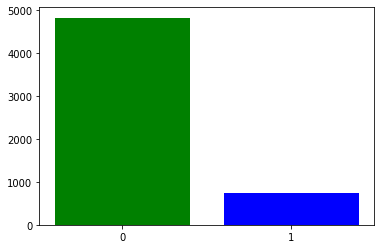

In [8]:
unique, count = np.unique(target, return_counts=True)
plt.xticks(unique, unique)
plt.bar(unique, count, color=['green','blue'])

In [9]:
print('sentence quantity: {} ,train sample: {} ,test sample: {}'.format(len(target),len(target)*0.8,len(target)*0.2))

sentence quantity: 5572 ,train sample: 4457.6 ,test sample: 1114.4


In [12]:
from nltk.corpus import stopwords
Stopwords = stopwords.words('english')
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
import re
email=data[:,1]
email=[re.sub("[^a-zA-Z]"," ", e) for e in email]
strings=np.char.split(np.char.lower(email))
words = [[stemmer.stem(word) for word in string if word not in set(Stopwords)] for string in strings ]
sentence = [' '.join(row) for row in words]
sentence[:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cv = CountVectorizer()
tfidf = TfidfTransformer()
X = sentence
y = tf.keras.utils.to_categorical(target,2)
X = cv.fit_transform(X).toarray()
# X[0,:20]

In [14]:
X = tfidf.fit_transform(X).toarray()
# X[0,:20]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [16]:
print('train vs test:{} ,{}'.format(X_train.shape[0], X_test.shape[0]))

train vs test:4457 ,1115


In [19]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1024, activation='elu',input_dim=X_train.shape[1],kernel_initializer='normal'),
        tf.keras.layers.Dense(256, activation='elu',kernel_initializer='normal'),
        tf.keras.layers.Dense(64, activation='elu',kernel_initializer='normal'),
        tf.keras.layers.Dense(16, activation='elu',kernel_initializer='normal'),
        tf.keras.layers.Dense(units = 2, activation='softmax')
    ])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20,batch_size=60)

Epoch 1/20
75/75 [==============================] - 2s 12ms/step - loss: 0.1158 - accuracy: 0.9594
Epoch 2/20
75/75 [==============================] - 1s 11ms/step - loss: 0.0248 - accuracy: 0.9924
Epoch 3/20
75/75 [==============================] - 1s 12ms/step - loss: 0.0098 - accuracy: 0.9980
Epoch 4/20
75/75 [==============================] - 1s 12ms/step - loss: 0.0075 - accuracy: 0.9982
Epoch 5/20
75/75 [==============================] - 1s 11ms/step - loss: 0.0034 - accuracy: 0.9991
Epoch 6/20
75/75 [==============================] - 1s 12ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 7/20
75/75 [==============================] - 1s 12ms/step - loss: 6.2959e-04 - accuracy: 0.9996
Epoch 8/20
75/75 [==============================] - 1s 11ms/step - loss: 4.1051e-06 - accuracy: 1.0000
Epoch 9/20
75/75 [==============================] - 1s 11ms/step - loss: 5.2557e-08 - accuracy: 1.0000
Epoch 10/20
75/75 [==============================] - 1s 12ms/step - loss: 1.3346e-08 - accuracy: 

In [34]:
y_pred=model.predict(X_test)
Y_pred=np.argmax(y_pred,axis=1)
Y_test=np.argmax(y_test,axis=1)
# Y_pred[:10]

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix
ac = accuracy_score(Y_pred,Y_test)
cm = confusion_matrix(Y_pred,Y_test)

In [29]:
print(ac)
print(cm)

0.9713004484304932
[[962  29]
 [  3 121]]
